In [303]:
import pandas as pd
import numpy as np

In [304]:
csv_df = pd.read_csv('firedata_mock.csv')

In [305]:
csv_df.describe()

,num,CBH,FMC,SH,ws,FFMC,DMC,DC,MC.SA
count,108.00000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,54.50000,4.664815,98.457407,12.437037,12.895370,98.237037,44.720370,224.685185,10.014424
std,31.32092,3.009902,15.694801,5.850767,5.803212,79.740754,17.594114,99.633876,2.886097
min,1.00000,0.400000,12.000000,0.300000,3.000000,83.500000,9.000000,60.000000,6.019993
25%,27.75000,2.537500,87.000000,10.000000,8.500000,89.400000,33.000000,158.250000,7.814972
50%,54.50000,4.300000,99.000000,12.000000,12.000000,90.650000,43.500000,222.000000,9.491184
75%,81.25000,6.000000,112.000000,17.250000,15.925000,92.200000,57.000000,293.750000,11.787318
max,108.00000,12.700000,120.000000,25.000000,34.600000,919.000000,89.000000,443.000000,19.424700


In [306]:
csv_df.head()

,num,Fire.site,Plot,Date,CBH,FMC,SH,ws,FFMC,DMC,DC,MC.SA,Fire.type
0,47,PANP,3,1962-06-11,5.0,92.0,12.0,14.9,92.2,64.0,190,7.272996,AC
1,13,Pacific Fire Experiment,2,1962-06-17,8.8,103.0,16.0,6.0,90.2,51.0,225,8.243254,S
2,89,Jack Pine,1,1962-07-30,8.0,101.0,15.0,11.0,89.5,50.0,388,12.709849,S
3,14,Pacific Fire Experiment,2b,1962-08-13,8.8,115.0,19.0,11.0,90.4,28.0,308,11.904373,S
4,15,Pacific Fire Experiment,4,1963-06-27,8.9,105.0,19.0,8.0,92.9,37.0,222,8.156684,S


In [307]:
import seaborn as sb
import matplotlib.pyplot as plt

In [308]:
X = csv_df.iloc[:,4:12]

In [309]:
X.head()

,CBH,FMC,SH,ws,FFMC,DMC,DC,MC.SA
0,5.0,92.0,12.0,14.9,92.2,64.0,190,7.272996
1,8.8,103.0,16.0,6.0,90.2,51.0,225,8.243254
2,8.0,101.0,15.0,11.0,89.5,50.0,388,12.709849
3,8.8,115.0,19.0,11.0,90.4,28.0,308,11.904373
4,8.9,105.0,19.0,8.0,92.9,37.0,222,8.156684


In [310]:
y = csv_df.iloc[:,-1]

In [311]:
y.head()

0    AC
1     S
2     S
3     S
4     S
Name: Fire.type, dtype: object

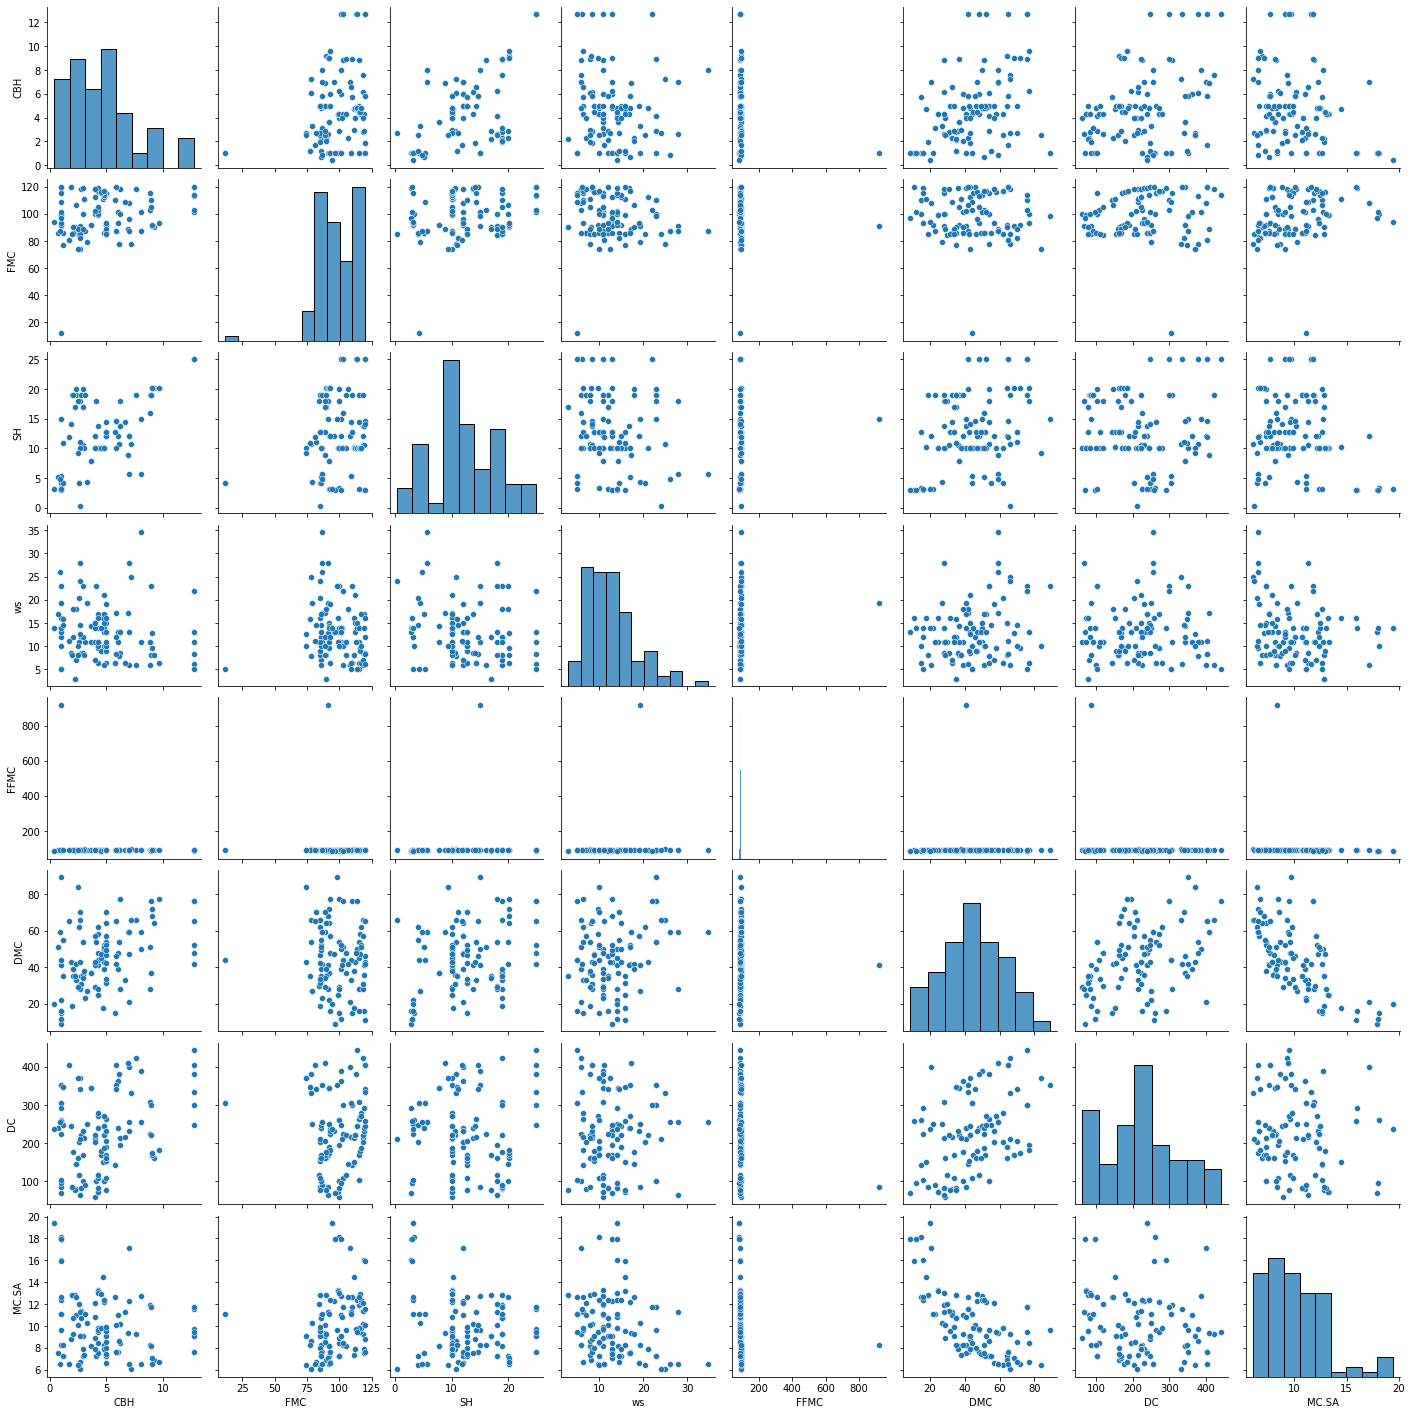

In [312]:
sb.pairplot(X)

In [313]:
X_abnormal = X[(X.iloc[:,1]<25) | (X.iloc[:,4]>600)] # show abnormal data points

In [314]:
X_filtered = X.iloc[0:17].append(X.iloc[18:64]).append(X.iloc[65:]) # filter abnormal data points

In [315]:
X_filtered.head()

,CBH,FMC,SH,ws,FFMC,DMC,DC,MC.SA
0,5.0,92.0,12.0,14.9,92.2,64.0,190,7.272996
1,8.8,103.0,16.0,6.0,90.2,51.0,225,8.243254
2,8.0,101.0,15.0,11.0,89.5,50.0,388,12.709849
3,8.8,115.0,19.0,11.0,90.4,28.0,308,11.904373
4,8.9,105.0,19.0,8.0,92.9,37.0,222,8.156684


In [316]:
X_abnormal.head()

,CBH,FMC,SH,ws,FFMC,DMC,DC,MC.SA
17,1.0,91.0,15.0,19.2,919.0,41.0,86,8.297158
64,1.0,12.0,4.2,5.0,90.2,44.0,306,11.115992


In [317]:
y_filtered = y.iloc[0:17].append(y.iloc[18:64]).append(y.iloc[65:])

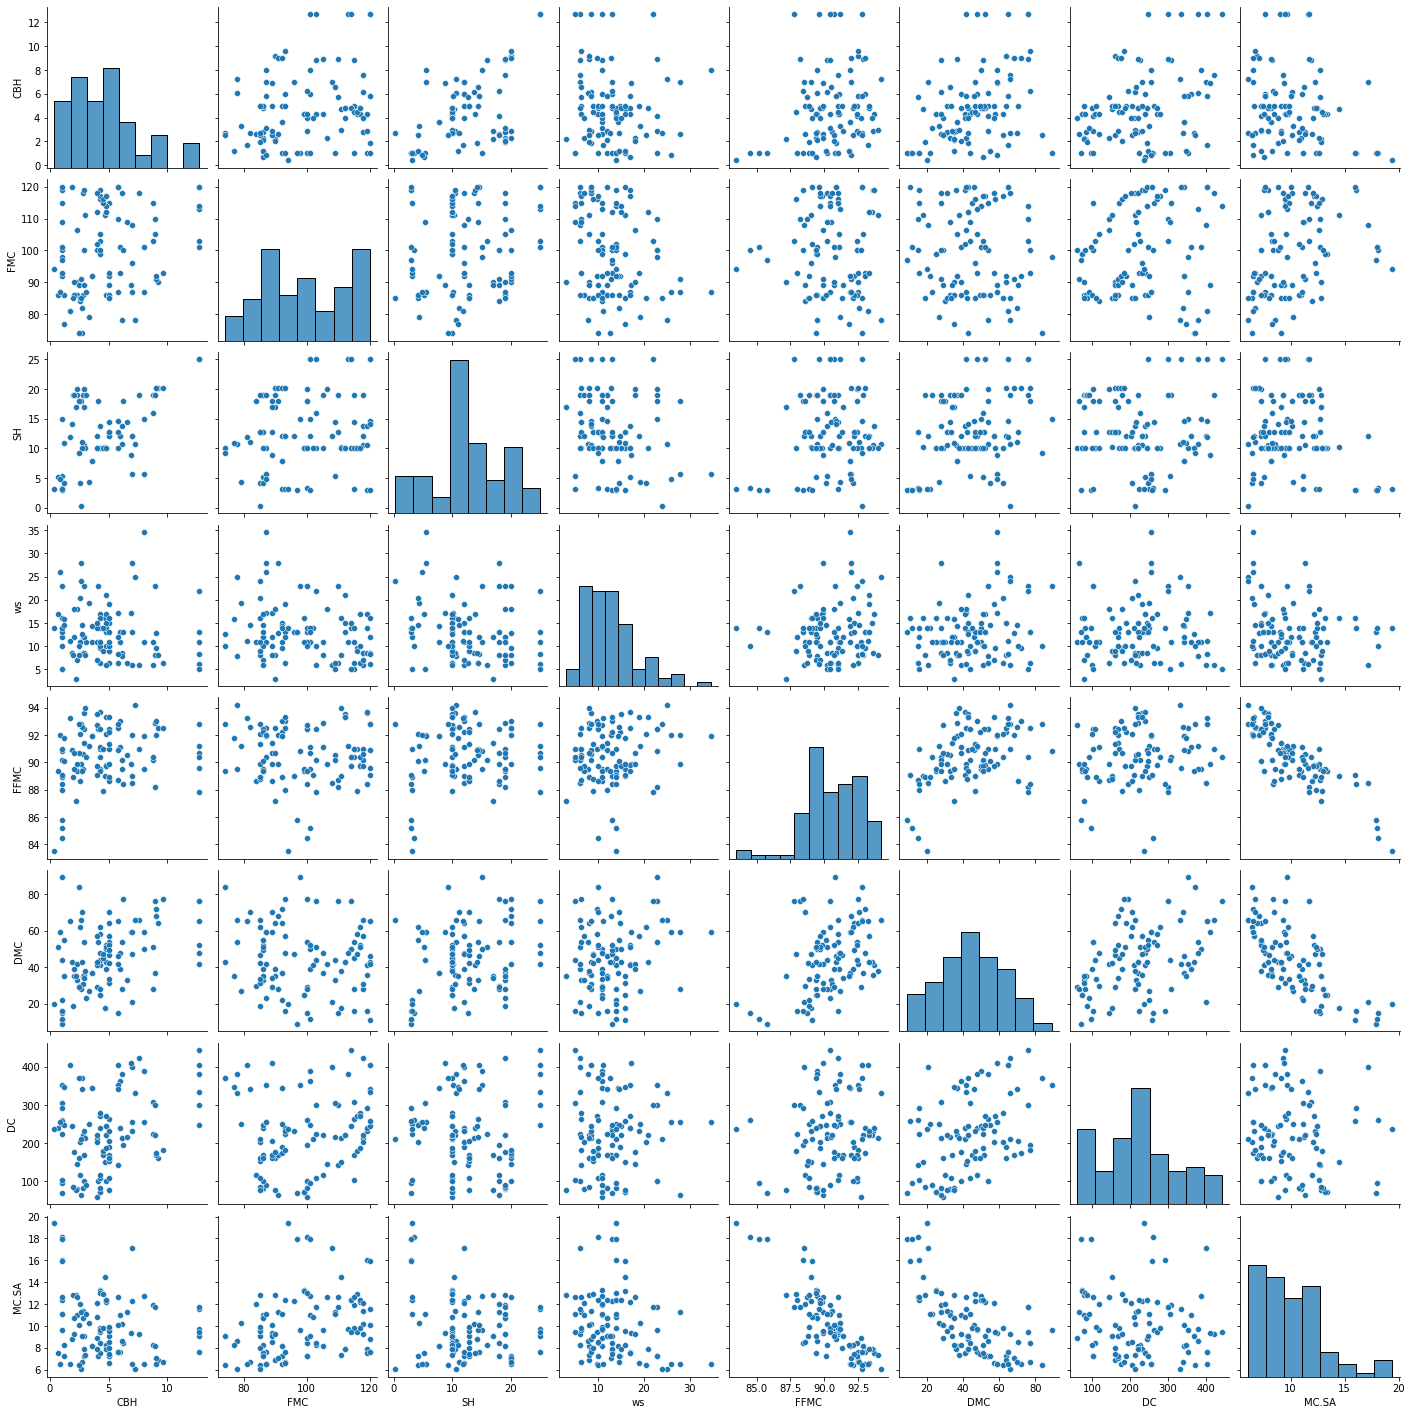

In [318]:
sb.pairplot(X_filtered)

In [319]:
X_filtered.corr()

,CBH,FMC,SH,ws,FFMC,DMC,DC,MC.SA
CBH,1.000000,0.236962,0.635746,-0.102245,0.203200,0.424776,0.325603,-0.229427
FMC,0.236962,1.000000,0.111932,-0.268291,-0.042315,-0.092918,0.159051,0.312368
SH,0.635746,0.111932,1.000000,-0.216917,0.146281,0.314591,0.012969,-0.194235
ws,-0.102245,-0.268291,-0.216917,1.000000,0.140261,0.187675,-0.005345,-0.194268
FFMC,0.203200,-0.042315,0.146281,0.140261,1.000000,0.432643,0.173348,-0.844815
DMC,0.424776,-0.092918,0.314591,0.187675,0.432643,1.000000,0.417140,-0.651923
DC,0.325603,0.159051,0.012969,-0.005345,0.173348,0.417140,1.000000,-0.170963
MC.SA,-0.229427,0.312368,-0.194235,-0.194268,-0.844815,-0.651923,-0.170963,1.000000


In [320]:
X_filtered.describe()

,CBH,FMC,SH,ws,FFMC,DMC,DC,MC.SA
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,4.733962,99.343396,12.490566,12.910377,90.569811,44.762264,225.226415,10.020232
std,2.995233,13.360660,5.845672,5.774623,2.002625,17.756986,99.345600,2.906637
min,0.400000,74.000000,0.300000,3.000000,83.500000,9.000000,60.000000,6.019993
25%,2.612500,87.000000,10.000000,8.500000,89.400000,33.000000,160.250000,7.690507
50%,4.300000,99.500000,12.000000,12.000000,90.650000,43.500000,222.000000,9.491184
75%,6.000000,112.000000,17.750000,15.675000,92.175000,57.000000,288.750000,11.865355
max,12.700000,120.000000,25.000000,34.600000,94.200000,89.000000,443.000000,19.424700


In [321]:
idxs = [0,1,2,3,5,6,7]
X_filtered = X_filtered.iloc[:,idxs]

In [322]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_filtered = le.fit_transform(y_filtered)

In [323]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size = 0.25)

In [324]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

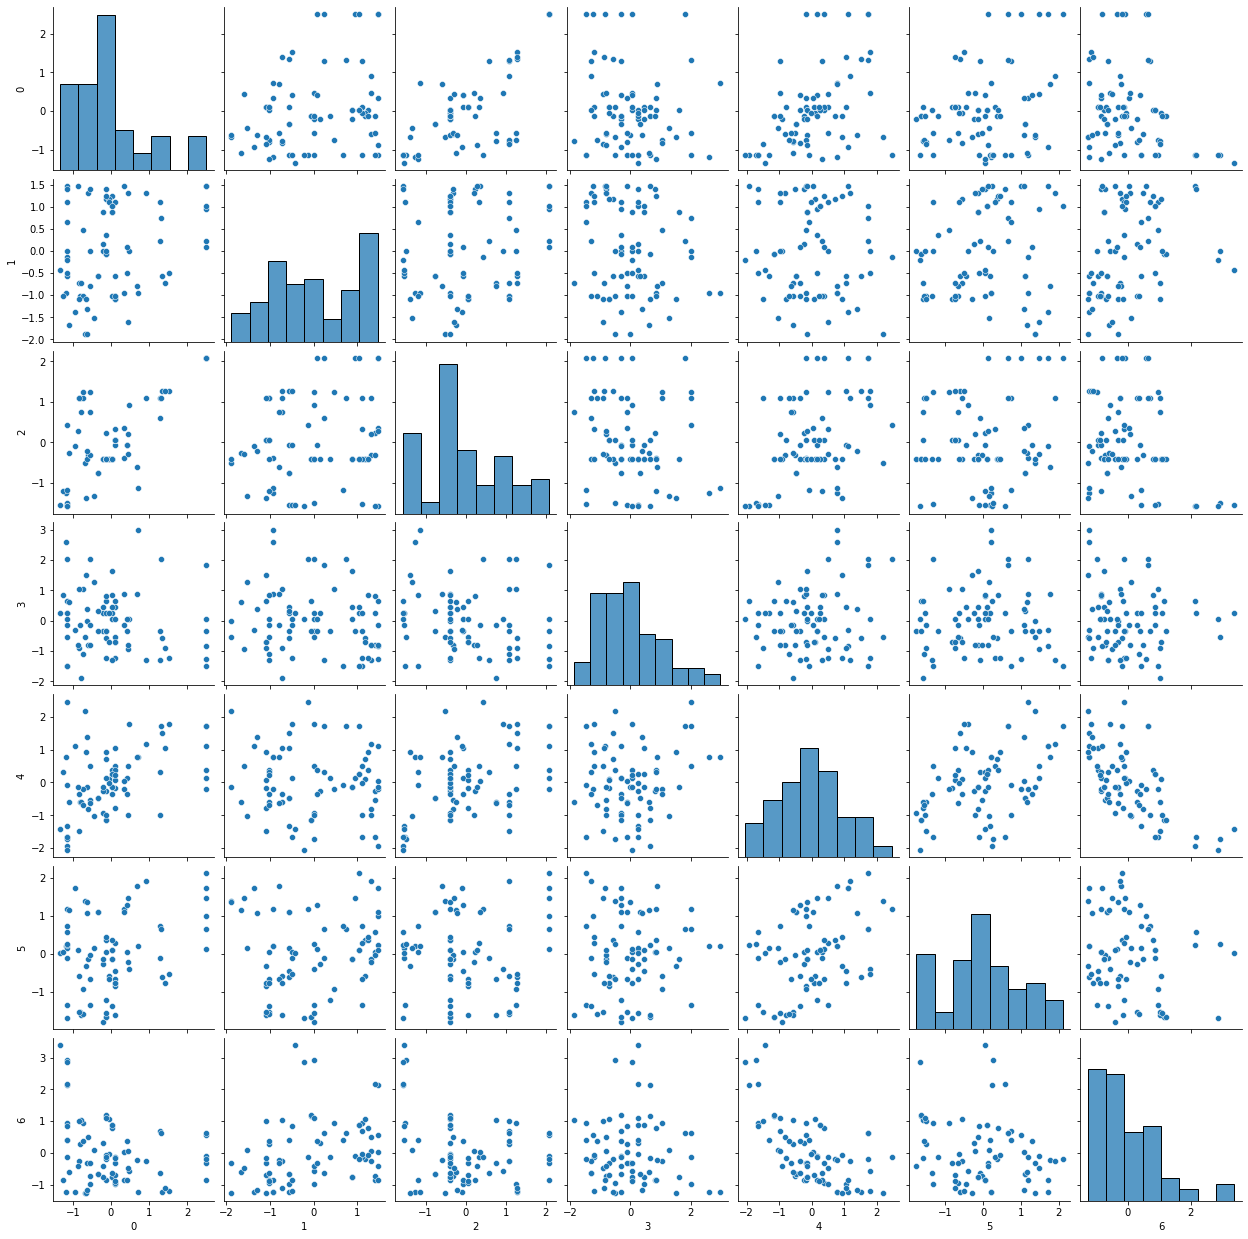

In [325]:
sb.pairplot(pd.DataFrame(X_train))

In [326]:
np.cov(X_train,rowvar=False)

array([[ 1.01282051,  0.2595716 ,  0.72376093, -0.14488544,  0.46700037,
         0.29672239, -0.26391719],
       [ 0.2595716 ,  1.01282051,  0.14856041, -0.17572486, -0.07670005,
         0.1267397 ,  0.30497775],
       [ 0.72376093,  0.14856041,  1.01282051, -0.20054211,  0.45430678,
         0.07738771, -0.26557985],
       [-0.14488544, -0.17572486, -0.20054211,  1.01282051,  0.14036254,
         0.04749568, -0.09122202],
       [ 0.46700037, -0.07670005,  0.45430678,  0.14036254,  1.01282051,
         0.41983675, -0.62950762],
       [ 0.29672239,  0.1267397 ,  0.07738771,  0.04749568,  0.41983675,
         1.01282051, -0.19764098],
       [-0.26391719,  0.30497775, -0.26557985, -0.09122202, -0.62950762,
        -0.19764098,  1.01282051]])

In [327]:
X_train.shape,y_train.shape

((79, 7), (79,))

In [328]:
X_test.size,y_test.size

(189, 27)

In [329]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.36583869 0.2247332  0.14868808]


In [330]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
acc= accuracy_score(y_test,y_pred)
print(acc)

[[ 4  1  1]
 [ 2  1  0]
 [ 1  1 16]]
0.7777777777777778


In [331]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc= accuracy_score(y_test,y_pred)
print(acc)

[[ 3  3  0]
 [ 1  1  1]
 [ 2  3 13]]
0.6296296296296297


In [332]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc= accuracy_score(y_test,y_pred)
print(acc)

[[ 6  0  0]
 [ 2  1  0]
 [ 2  2 14]]
0.7777777777777778


In [333]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc= accuracy_score(y_test,y_pred)
print(acc)

[[ 3  2  1]
 [ 0  1  2]
 [ 2  3 13]]
0.6296296296296297


In [334]:
y_pred

array([2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1,
       0, 2, 2, 1, 1])

In [335]:
c_0 = 0
c_1 = 0
c_2 = 0
for val in y_filtered:
    if  val == 0:
        c_0 +=1
    elif val == 1:
        c_1 +=1
    else:
        c_2 +=1

In [336]:
c_0,c_1,c_2

(34, 21, 51)

In [337]:
c_0+c_1+c_2

106

In [338]:
arr_0 = np.zeros((c_0,7))
arr_1 = np.zeros((c_1,7))
arr_2 = np.zeros((c_2,7))

In [339]:
X_filtered.size/7

106.0

In [340]:
in_0 = 0
in_1 =0
in_2 = 0
for i,val in enumerate(y_filtered):
    if  val == 0:
        arr_0[in_0] = np.array(X_filtered.iloc[i,:])
        in_0 += 1
    elif val == 1:
        arr_1[in_1] = np.array(X_filtered.iloc[i,:])
        in_1 += 1
    else:
        arr_2[in_2] = np.array(X_filtered.iloc[i,:])
        in_2 += 1

In [341]:
np.arange(c_0)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

<AxesSubplot:>

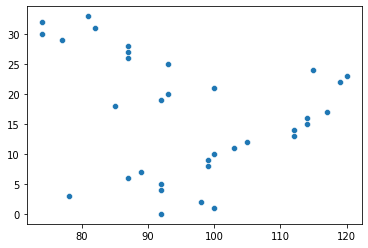

In [342]:
sb.scatterplot(x=arr_0[:,1], y=np.arange(c_0))

<AxesSubplot:>

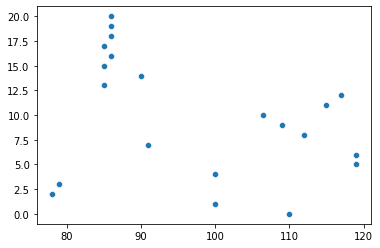

In [343]:
sb.scatterplot(x=arr_1[:,1], y=np.arange(c_1))

<AxesSubplot:>

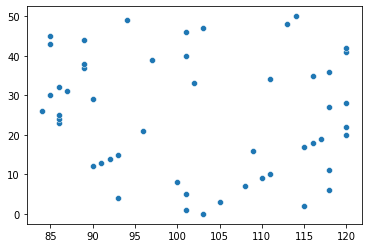

In [344]:
sb.scatterplot(x=arr_2[:,1], y=np.arange(c_2))

In [345]:
combine_filtered = np.append(X_filtered,y_filtered.reshape(-1,1),axis=1)
combine_filtered[:,7]

array([0., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 0., 2., 2., 2., 1., 0.,
       2., 2., 2., 0., 2., 1., 0., 0., 2., 0., 0., 2., 2., 2., 2., 2., 1.,
       2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 0., 0., 0., 0., 0.,
       2., 2., 2., 2., 2., 1., 0., 0., 0., 0., 0., 1., 1., 1., 2., 1., 2.,
       1., 0., 2., 2., 1., 0., 0., 0., 0., 0., 2., 2., 0., 2., 2., 2., 1.,
       1., 1., 1., 2., 0., 2., 1., 1., 0., 0., 0., 2., 2., 2., 0., 0., 0.,
       2., 2., 0., 0.])

<AxesSubplot:>

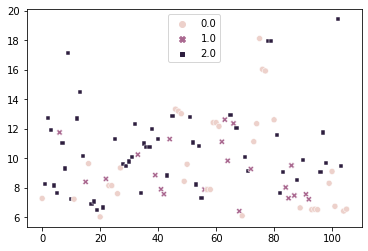

In [346]:
sb.scatterplot(y=combine_filtered[:,6], x=np.arange(106),hue=combine_filtered[:,7],style=combine_filtered[:,7])
#sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")

In [347]:
#arr_0_sub = np.random.choice(arr_0, size=21, replace=False)

In [348]:
idx_0_train = np.random.randint(34, size=10)
idx_1_train = np.random.randint(21, size=10)
idx_2_train = np.random.randint(51, size=10)

In [349]:
idxs_test_0 = set(range(34))-set(idx_0_train)
idxs_test_1 = set(range(21))-set(idx_1_train)
idxs_test_2 = set(range(51))-set(idx_2_train)

In [350]:
import random
idxs_test_0 = random.sample(idxs_test_0,11)
idxs_test_1 = random.sample(idxs_test_1,11)
idxs_test_2 = random.sample(idxs_test_2,11)

C:\Users\HP\AppData\Local\Temp/ipykernel_45368/3690126529.py:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  idxs_test_0 = random.sample(idxs_test_0,11)
C:\Users\HP\AppData\Local\Temp/ipykernel_45368/3690126529.py:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  idxs_test_1 = random.sample(idxs_test_1,11)
C:\Users\HP\AppData\Local\Temp/ipykernel_45368/3690126529.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  idxs_test_2 = random.sample(idxs_test_2,11)


In [351]:
idxs_test_2

[17, 27, 33, 5, 7, 41, 37, 9, 36, 30, 2]

In [352]:
arr_0_sub = arr_0[idx_0_train,:]
arr_1_sub = arr_1[idx_1_train,:]
arr_2_sub = arr_2[idx_2_train,:]

In [353]:
arr_temp = np.append(arr_0_sub,arr_1_sub,axis=0)
arr_all = np.append(arr_temp,arr_2_sub,axis=0)

In [354]:
arr_all.shape

(30, 7)

In [355]:
y_0_train = np.zeros(10)
y_1_train = np.ones(10)
y_2_train  =np.ones(10)*2;

y_2

In [356]:
y_temp = np.append(y_0_train,y_1_train,axis=0)
y_train = np.append(y_temp,y_2_train,axis=0)

In [357]:
y_train.shape

(30,)

In [358]:
arr_0_sub_test = arr_0[idxs_test_0,:]
arr_1_sub_test = arr_1[idxs_test_1,:]
arr_2_sub_test = arr_2[idxs_test_2,:]

In [359]:
arr_temp = np.append(arr_0_sub_test,arr_1_sub_test,axis=0)
arr_all_test = np.append(arr_temp,arr_2_sub_test,axis=0)

In [360]:
y_0_test = np.zeros(11)
y_1_test = np.ones(11)
y_2_test  =np.ones(11)*2;

In [361]:
y_temp = np.append(y_0_test,y_1_test,axis=0)
y_test = np.append(y_temp,y_2_test,axis=0)

In [362]:
arr_all_test.shape

(33, 7)

In [363]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(arr_all)
X_test = sc.transform(arr_all_test)

In [364]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
acc= accuracy_score(y_test,y_pred)
print(acc)

[[7 4 0]
 [5 3 3]
 [0 3 8]]
0.5454545454545454


In [365]:
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [366]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc= accuracy_score(y_test,y_pred)
print(acc)

[[8 3 0]
 [8 0 3]
 [2 6 3]]
0.3333333333333333
